# Linear regression
- list one
- list two

In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


### This is new chapter

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import Model

Let's create noisy data (100 points) in form of `m * X + b = Y`:

In [5]:
def make_noisy_data(w=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)
    y = w * x + b + noise
    return x, y

In [6]:
X, Y = make_noisy_data()

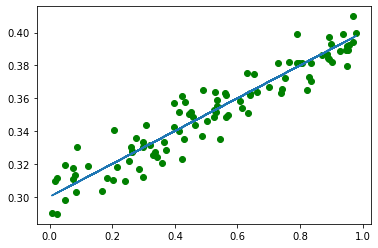

In [7]:
plt.plot(X, Y, 'go')
plt.plot(X, 0.1*X+0.3)

In [8]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.26433897, 0.5350039 , 0.41334093, 0.26014364, 0.54455423,
       0.90342677, 0.78888905, 0.53536654, 0.5029079 , 0.41218674,
       0.89051986, 0.8359734 , 0.42808533, 0.95159745, 0.07930541,
       0.65274966, 0.5256462 , 0.04934168, 0.8873054 , 0.9679729 ,
       0.20097256, 0.4503132 , 0.2968186 , 0.7283535 , 0.12152994,
       0.4326315 , 0.89881337, 0.39674866, 0.07515347, 0.53131366,
       0.94775546, 0.7019423 , 0.7406889 , 0.39860976, 0.21595609,
       0.36026657, 0.16556454, 0.07509661, 0.7890885 , 0.29699206,
       0.76374996, 0.52500916, 0.6384671 , 0.56285465, 0.4567349 ,
       0.93676376, 0.25275588, 0.23970151, 0.52946615, 0.6067188 ,
       0.82923317, 0.3217486 , 0.36433804, 0.02277648, 0.9268569 ,
       0.28495252, 0.0860554 , 0.46325374, 0.97928166, 0.6160233 ,
       0.66359735, 0.89110935, 0.44648826, 0.6415261 , 0.00657475,
       0.08507586, 0.29863703, 0.42137384, 0.02300668, 0.6313534 ,
       0.30723

(array([15., 20., 26., 14., 25.]),
 array([0.00657475, 0.20111613, 0.3956575 , 0.5901989 , 0.78474027,
        0.97928166], dtype=float32),
 <a list of 5 Patch objects>)

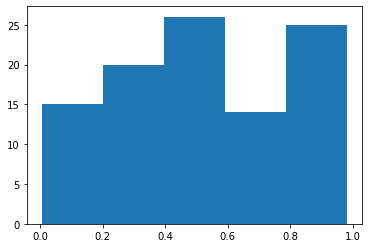

In [9]:
plt.hist(X, bins=5)

In [10]:
w = tf.Variable(0.)
b = tf.Variable(0.)

In [11]:
def predict(x):
    y = w * x + b
    return y

In [12]:
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [13]:
loss = mean_squared_error(predict(X), Y)
print("Starting loss", loss.numpy())

Starting loss 0.12394729


In [14]:
learning_rate = 0.05
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.123947
Step 20, Loss 0.000771
Step 40, Loss 0.000225
Step 60, Loss 0.000193
Step 80, Loss 0.000169
Step 100, Loss 0.000151
Step 120, Loss 0.000136
Step 140, Loss 0.000125
Step 160, Loss 0.000116
Step 180, Loss 0.000110


In [15]:
print("After {} steps we learned that w={} and b={}".format(steps, w.numpy(), b.numpy()))

After 200 steps we learned that w=0.11174654960632324 and b=0.2927868068218231


In [16]:
print(w.numpy(), b.numpy())

0.11174655 0.2927868


In [17]:
w.numpy(), b.numpy()

(0.11174655, 0.2927868)

In [18]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.11174655>

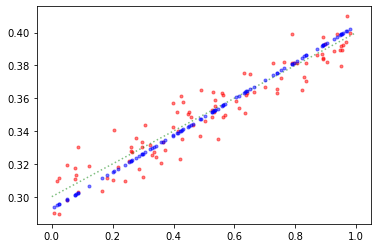

In [19]:
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

Step 0, Loss 0.000104
Step 20, Loss 0.000103
Step 40, Loss 0.000103
Step 60, Loss 0.000102
Step 80, Loss 0.000101
Step 100, Loss 0.000100
Step 120, Loss 0.000100
Step 140, Loss 0.000099
Step 160, Loss 0.000098
Step 180, Loss 0.000098


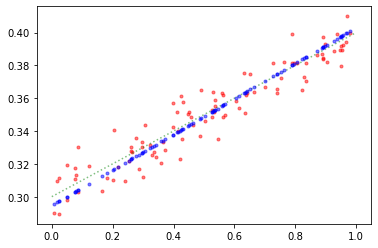

In [20]:
learning_rate = 0.01
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))
        
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

In [21]:
min_loss = mean_squared_error(0.1*X+0.3, Y)
print("Minimum loss", min_loss.numpy())

Minimum loss 8.7193024e-05


In [22]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=0.001467048>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.0008061153>]

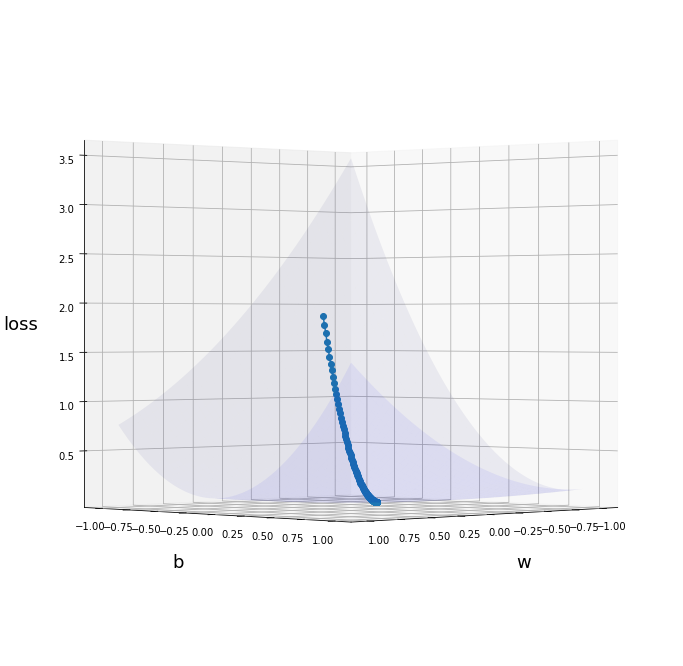

In [33]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=20, azim=45)
plt.show()